# Homework Starter — Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
n = 160
df = pd.DataFrame({
    'date': pd.date_range('2021-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
})
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)

# inject a bit of missingness and outliers
df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12
df.head()

,date,region,age,income,transactions,spend
0,2021-02-01,West,37.6,28086.81,4,73.35
1,2021-02-02,North,43.0,33034.75,1,52.37
2,2021-02-03,South,38.2,50045.39,2,131.85
3,2021-02-04,South,24.9,39467.28,4,147.58
4,2021-02-05,South,59.8,31201.65,1,86.76


## 1) First look

In [2]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          160 non-null    datetime64[ns]
 1   region        160 non-null    object        
 2   age           160 non-null    float64       
 3   income        155 non-null    float64       
 4   transactions  160 non-null    int64         
 5   spend         157 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 7.6+ KB


(None,
 date            0
 region          0
 age             0
 income          5
 transactions    0
 spend           3
 dtype: int64)

## 2) Numeric profile

In [3]:
desc = df[['age','income','transactions','spend']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
age,160.0,40.018750,8.458676,22.00,34.70,40.15,44.925,61.10,0.069538,-0.080125
income,155.0,41983.866323,13262.457038,17928.80,32471.53,39332.52,49697.690,87052.40,0.993336,0.918722
transactions,160.0,3.237500,2.585610,0.00,2.00,3.00,4.000,20.00,3.466078,19.984802
spend,157.0,117.291592,51.768645,0.54,77.25,119.32,153.340,280.05,0.130860,-0.084917


## 3) Distributions (TODO: add at least 3)

In [6]:
df

,date,region,age,income,transactions,spend
0,2021-02-01,West,37.6,28086.81,4,73.35
1,2021-02-02,North,43.0,33034.75,1,52.37
2,2021-02-03,South,38.2,50045.39,2,131.85
3,2021-02-04,South,24.9,39467.28,4,147.58
4,2021-02-05,South,59.8,31201.65,1,86.76
...,...,...,...,...,...,...
155,2021-07-06,South,39.3,57863.60,20,136.87
156,2021-07-07,East,41.4,43912.51,5,116.26
157,2021-07-08,East,30.9,53308.27,2,134.47
158,2021-07-09,East,34.8,28731.93,2,82.64


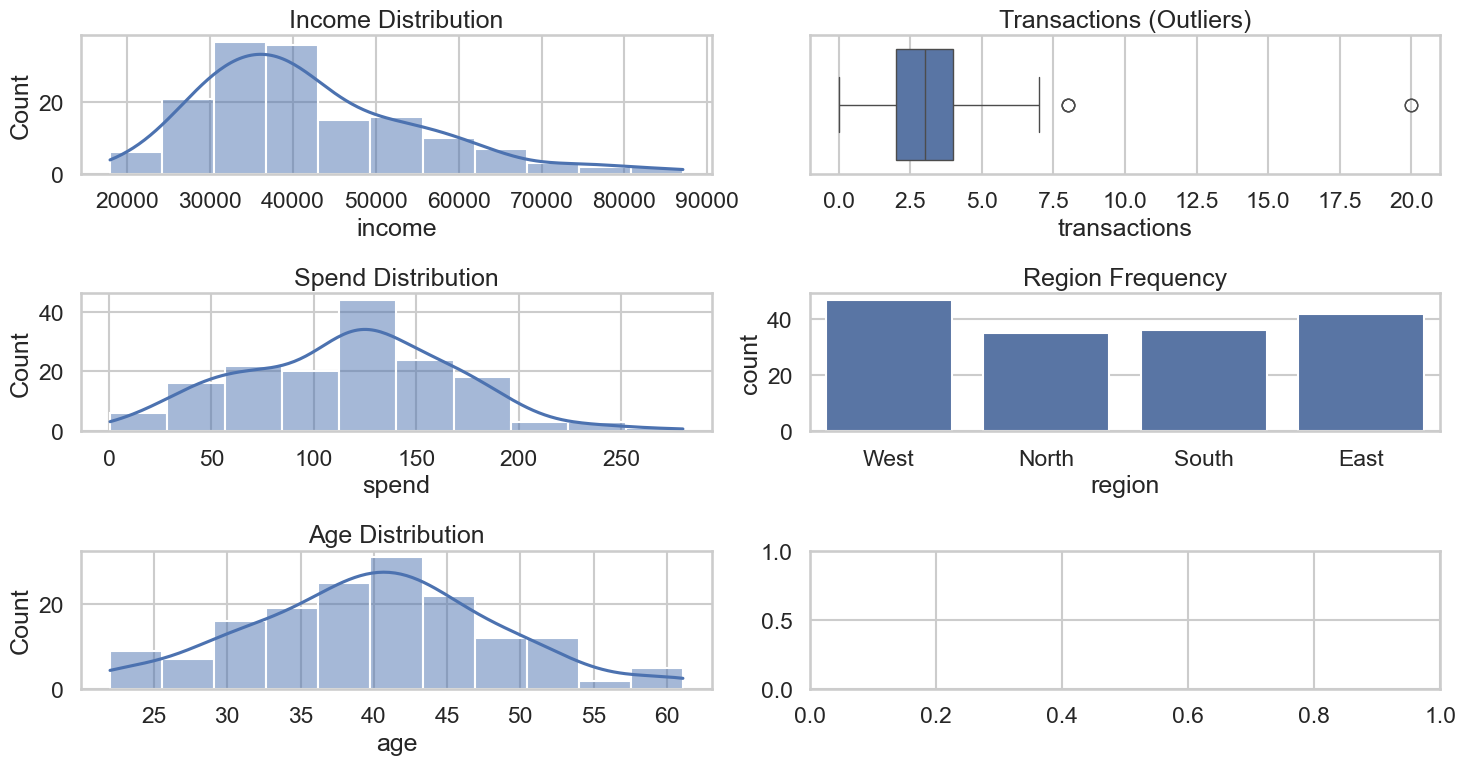

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(15, 8))

# Income Hist
sns.histplot(df['income'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Income Distribution')

# Transactions box
sns.boxplot(x=df['transactions'], ax=axes[0, 1])
axes[0,1].set_title('Transactions (Outliers)')

# Spend Hist
sns.histplot(df['spend'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Spend Distribution')

# Region Distribution
sns.countplot(x=df['region'], ax=axes[1, 1])
axes[1, 1].set_title('Region Frequency')

# Age distribution
sns.histplot(df['age'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Age Distribution')
plt.tight_layout()
plt.show()

## 4) Relationships (TODO: add at least 2)

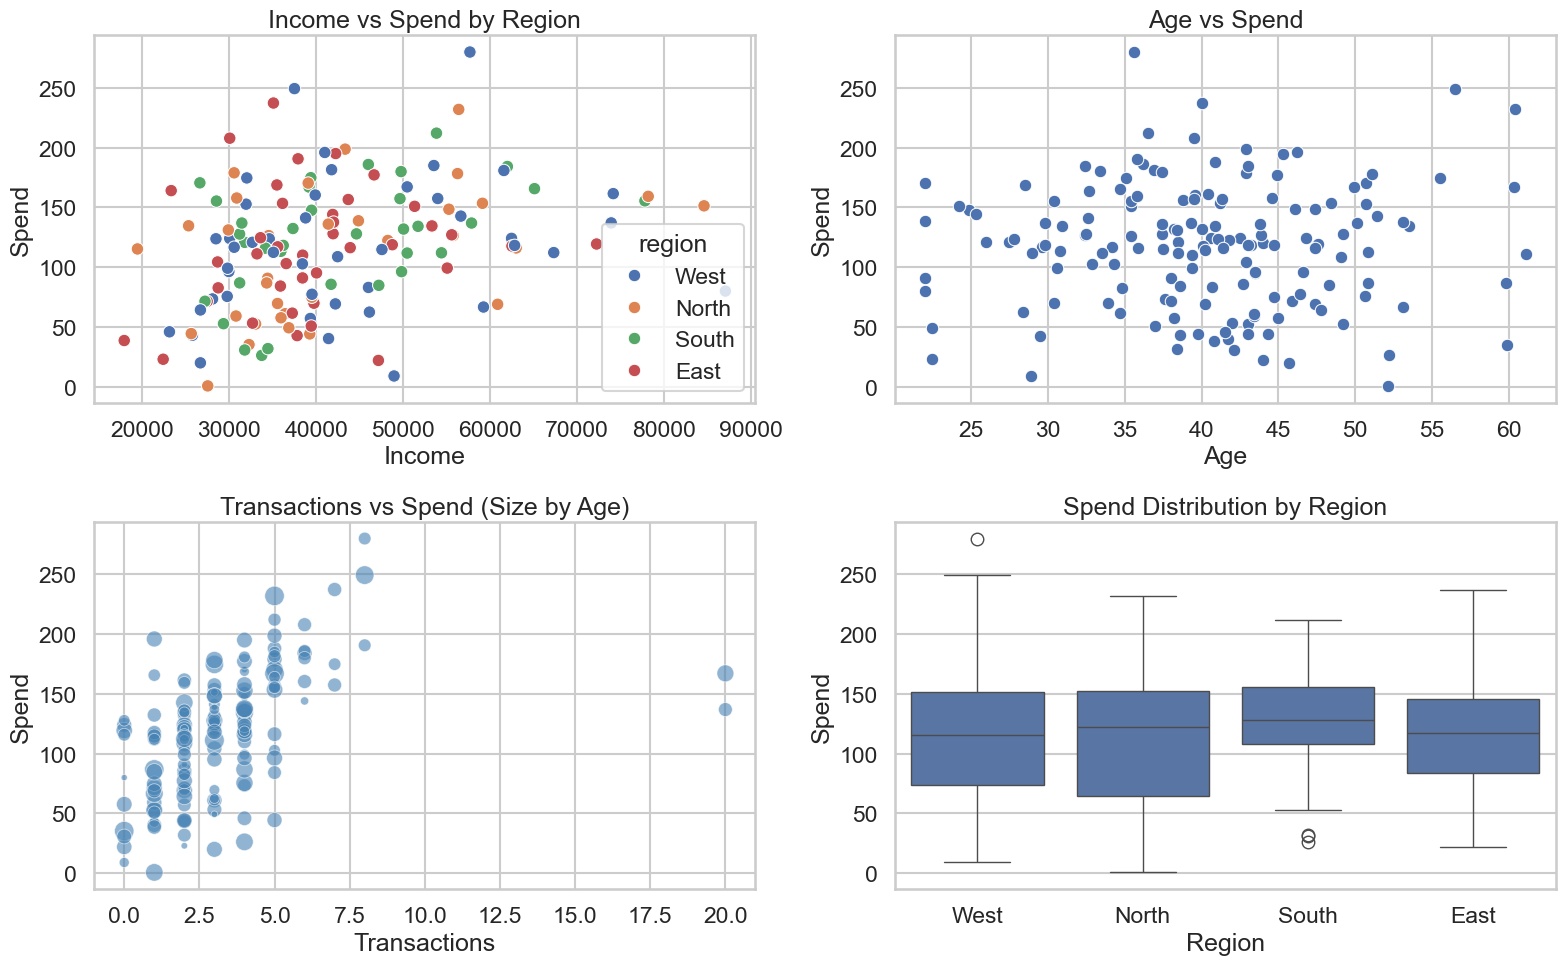

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Income vs Spend
sns.scatterplot(data=df, x='income', y='spend', hue='region', ax=axes[0, 0])
axes[0, 0].set_title('Income vs Spend by Region')
axes[0, 0].set_xlabel('Income')
axes[0, 0].set_ylabel('Spend')

# Plot 2: Age vs Spend
sns.scatterplot(data=df, x='age', y='spend', ax=axes[0, 1])
axes[0, 1].set_title('Age vs Spend')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Spend')

# Plot 3: Transactions vs Spend
sns.scatterplot(
    data=df,
    x='transactions', y='spend',
    size='age', sizes=(20, 200),
    color='steelblue', alpha=0.6, ax=axes[1, 0], legend=False
)
axes[1, 0].set_title('Transactions vs Spend (Size by Age)')
axes[1, 0].set_xlabel('Transactions')
axes[1, 0].set_ylabel('Spend')

# Plot 4: Spend Distribution by Region
sns.boxplot(data=df, x='region', y='spend', ax=axes[1, 1])
axes[1, 1].set_title('Spend Distribution by Region')
axes[1, 1].set_xlabel('Region')
axes[1, 1].set_ylabel('Spend')

plt.tight_layout()
plt.show()

## 5) (Optional) Correlation matrix

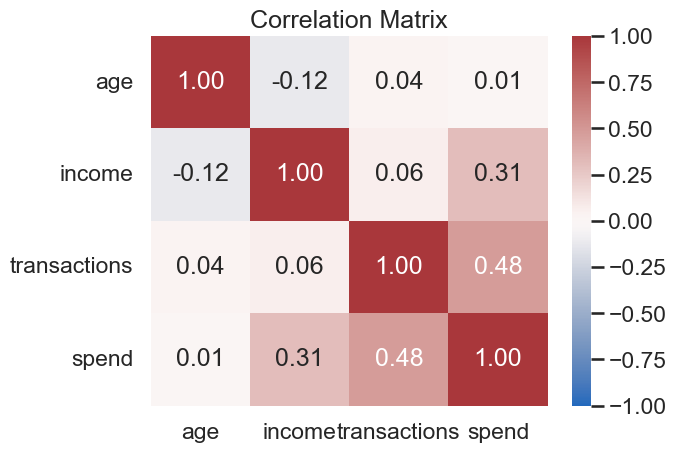

,age,income,transactions,spend
age,1.000000,-0.123160,0.037754,0.008174
income,-0.123160,1.000000,0.063573,0.307307
transactions,0.037754,0.063573,1.000000,0.480685
spend,0.008174,0.307307,0.480685,1.000000


In [11]:
corr = df[['age','income','transactions','spend']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr

## 6) Insights & Assumptions (write your commentary)
- TODO: Top 3 insights
- TODO: Assumptions & risks
- TODO: Next steps before modeling (cleaning & features)

Key Insights: The strongest predictor for spend is transactions. However, critical variables like income, spend, and transactions are heavily right-skewed and contain significant outliers. This means the raw data is unsuitable for a standard linear model without preprocessing. Additionally, spending habits do not appear to differ significantly across regions.

Core Assumption & Risk: The central assumption is that the observed outliers and missing data are random noise, not meaningful signals. The primary risk is that if these data points represent true "power users" or systematic reporting biases, cleaning them incorrectly could lead to a model that misunderstands key customer behaviors and performs poorly in the real world.

Actionable Next Steps:

Data Cleaning: A multi-step cleaning process is required. This involves imputing missing values (using the median due to skew), normalizing income and spend with a log transformation, and capping the extreme outliers in transactions to reduce their influence.
Feature Preparation: The categorical region column must be converted into a numerical format using one-hot encoding to be included in the model. Creating interaction features (e.g., age * log_income) could also be explored to capture more complex relationships.